# Tek Değişkenli Aykırı Gözlem Analizi

In [124]:
from warnings import filterwarnings
filterwarnings('ignore')

In [125]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds') 
df = diamonds.copy()
df = df.select_dtypes(include = ['float64', 'int64']) 
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [126]:
## Table değişkeni üzerinden aykırı değerleri belirleyelim

In [127]:
df_table = df["table"].copy()

<AxesSubplot:xlabel='table'>

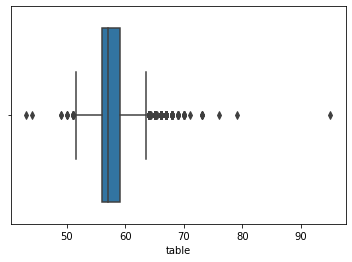

In [128]:
sns.boxplot(x = df_table)

In [129]:
# Alt ve üst eşik belirleme işlemleri şu şekilde yapılır.

Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3 - Q1

alt_sinir = Q1- 1.5*IQR
alt_sinir

ust_sinir = Q3 + 1.5*IQR
ust_sinir

63.5

In [130]:
# Vektör düzeyinde aykırı değer sorgulaması
(df_table < (alt_sinir)) | (df_table > (ust_sinir))

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [131]:
df_table < (alt_sinir)

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [132]:
aykiri_tf = df_table < (alt_sinir)

In [133]:
aykiri_tf[0:10]

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: table, dtype: bool

In [134]:
# Aykırıları yakalama, index dahil. 
aykirilar = df_table[aykiri_tf]
aykirilar.index

Int64Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
            25179, 26387, 33586, 35633, 45798, 46040, 47630],
           dtype='int64')

# Aykırı Değer Probleminin Çözülmesi

In [135]:
# Aykırı değer problemini 3 şekilde çözebiliriz.

# 1) Silebiliriz.
# 2) Ortalama ile doldurabiliriz.
# 3) Eşik değer değeri ile doldurabiliriz

In [136]:
import pandas as pd
import numpy as np

In [138]:
df_table.head()
type(df_table)
df_table.shape

(53940,)

In [143]:
df_table = np.array(df["table"])

In [145]:
temiz_df_table = df_table[~((df_table < (alt_sinir)) | (df_table > (ust_sinir))).any(axis = 0)]

In [146]:
temiz_df_table = pd.DataFrame(df_table, columns =["aykirilar"] )

In [148]:
temiz_df_table.shape

(53940, 1)

In [149]:
df_table = df["table"].copy()

<AxesSubplot:xlabel='table'>

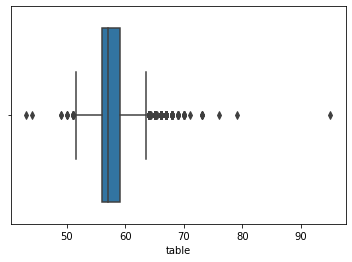

In [150]:
sns.boxplot(x = df_table)

In [151]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [152]:
df_table.mean() # ORTALAMA DEĞERİ BULMA

57.45718390804603

In [153]:
df_table[aykiri_tf] = df_table.mean() # aşağıda kalan aykırı değerlere ortalama atama.

In [154]:
df_table[aykiri_tf]

1515     57.457184
3238     57.457184
3979     57.457184
4150     57.457184
5979     57.457184
7418     57.457184
8853     57.457184
11368    57.457184
22701    57.457184
25179    57.457184
26387    57.457184
33586    57.457184
35633    57.457184
45798    57.457184
46040    57.457184
47630    57.457184
Name: table, dtype: float64

In [155]:
aykiri_tf = (df_table < (alt_sinir)) | (df_table > (ust_sinir))

In [156]:
df_table[aykiri_tf].head()

2      65.0
91     69.0
145    64.0
219    64.0
227    67.0
Name: table, dtype: float64

In [157]:
df_table.describe()

count    53940.000000
mean        57.459505
std          2.230030
min         51.600000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [158]:
df_table[aykiri_tf] = df_table.mean()

In [159]:
df_table.describe()

count    53940.000000
mean        57.374369
std          2.062703
min         51.600000
25%         56.000000
50%         57.000000
75%         59.000000
max         63.500000
Name: table, dtype: float64

In [160]:
df_table = df["table"].copy()

In [161]:
aykiri_tf = df_table < (alt_sinir)

In [162]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [163]:
# Baskılama yöntemi, aykırı değerleri alt sınır eşik değerleri ile doldur.
df_table[aykiri_tf] = alt_sinir 

In [164]:
df_table[aykiri_tf]

1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
45798    51.5
46040    51.5
47630    51.5
Name: table, dtype: float64

In [165]:
df_table[1515]
df_table[47630]

51.5

# Çok Değişkenli Aykırı Gözlem Analizi

## Local Outlier Factor

In [167]:
# Kendimiz bir veri oluşturuyoruz.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

np.random.seed(42)
X_inliers = np.random.normal(70, 3, (100, 2))

X_inliers = np.r_[X_inliers + 10, X_inliers - 10] 

print(X_inliers.shape)
print(X_inliers[:3,:2])

(200, 2)
[[81.49014246 79.5852071 ]
 [81.94306561 84.56908957]
 [79.29753988 79.29758913]]


In [168]:
X_outliers = np.random.uniform(low=15, high=130, size=(20, 2))

In [169]:
X_outliers

array([[115.89790327, 100.18839104],
       [ 95.15681021,  95.78566966],
       [ 56.34148239,  48.76306209],
       [108.07653288, 108.16304039],
       [114.71331664, 120.02266354],
       [ 73.80437587,  72.67437389],
       [106.80394558,  89.74585204],
       [ 95.72619088, 106.51615699],
       [117.35061431,  53.86944304],
       [ 58.19203955,  25.80792308],
       [ 81.50221621,  19.13336149],
       [ 68.54377209,  77.40413299],
       [ 47.95224399,  82.94582497],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263],
       [ 77.17303899,  88.30443867]])

In [170]:
# Aykırı gözlemleri ve diğerlerii birleştirdik
X = np.r_[X_inliers, X_outliers]

In [171]:
X[0:3,:]

array([[81.49014246, 79.5852071 ],
       [81.94306561, 84.56908957],
       [79.29753988, 79.29758913]])

In [172]:
LOF = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

In [173]:
# Skorlama işlemi yapıyoruz.
LOF.fit_predict(X)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [174]:
X_score = LOF.negative_outlier_factor_

In [175]:
X_score[0:3]

array([-0.99920793, -1.14732911, -0.97212675])

In [176]:
X_score.mean()

-1.6850227435158005

In [177]:
X_score.std()

2.140119050235338

In [178]:
np.sort(X_score)[0:10]

array([-15.3785652 , -11.57669644, -10.75276599, -10.24101046,
       -10.07364152,  -9.64406264,  -9.34229978,  -9.26256027,
        -9.06812573,  -8.51275904])

<function matplotlib.pyplot.show(close=None, block=None)>

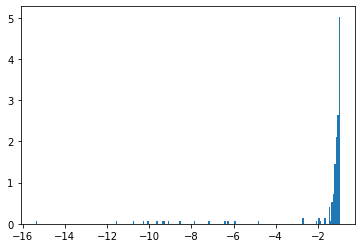

In [180]:
# Skorların dağılımı hakkında bilgi alalım
plt.hist(X_score, bins = "auto", density = True)
plt.show
# Aykırılık çok fazla gözükmüyor gibi ama numerik olarak bakmak lazım oranlarına.


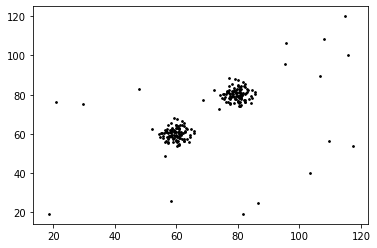

In [181]:
# Aykırı gözlemlerin görselleştirilmesi
plt.scatter(X[:,0], X[:,1], color = "k", s = 3, label = "Gözlem Birimleri");

In [182]:
# 2 değişken olduğundan sorun yok.
radius = radius = (X_score.max() - X_score) / (X_score.max() - X_score.min())

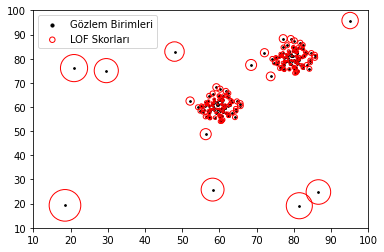

In [183]:
plt.scatter(X[:,0], X[:,1], color = "k", s = 3, label = "Gözlem Birimleri");

plt.scatter(X[:, 0], X[:, 1], s = 1000 * radius, edgecolors='r', 
            facecolors='none',label='LOF Skorları')

plt.xlim((10,100))
plt.ylim((10,100))

legend = plt.legend(loc = "upper left")

legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [30]

In [184]:
X[0:3]

array([[81.49014246, 79.5852071 ],
       [81.94306561, 84.56908957],
       [79.29753988, 79.29758913]])

In [186]:
np.sort(X_score)[0:9]

array([-15.3785652 , -11.57669644, -10.75276599, -10.24101046,
       -10.07364152,  -9.64406264,  -9.34229978,  -9.26256027,
        -9.06812573])

In [187]:
# eşik değerin belirlenmesi
esik_deger = np.sort(X_score)[9]
esik_deger

-8.512759037993277

In [188]:
(X_score > esik_deger)[200:220]

array([ True,  True,  True,  True, False,  True,  True,  True, False,
       False, False,  True,  True, False, False, False, False, False,
       False,  True])

In [189]:
# Aykırı olmayan gözlemler
tf_vektor = (X_score > esik_deger)

In [190]:
# Aykırı gözlemlere erişelim
X[X_score < esik_deger]

array([[114.71331664, 120.02266354],
       [117.35061431,  53.86944304],
       [ 81.50221621,  19.13336149],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263]])

In [191]:
X[~tf_vektor] # Aykırı gözlemler

array([[114.71331664, 120.02266354],
       [117.35061431,  53.86944304],
       [ 58.19203955,  25.80792308],
       [ 81.50221621,  19.13336149],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263]])

In [192]:
X[X_score < esik_deger]

array([[114.71331664, 120.02266354],
       [117.35061431,  53.86944304],
       [ 81.50221621,  19.13336149],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263]])

In [193]:
X[200:220]

array([[115.89790327, 100.18839104],
       [ 95.15681021,  95.78566966],
       [ 56.34148239,  48.76306209],
       [108.07653288, 108.16304039],
       [114.71331664, 120.02266354],
       [ 73.80437587,  72.67437389],
       [106.80394558,  89.74585204],
       [ 95.72619088, 106.51615699],
       [117.35061431,  53.86944304],
       [ 58.19203955,  25.80792308],
       [ 81.50221621,  19.13336149],
       [ 68.54377209,  77.40413299],
       [ 47.95224399,  82.94582497],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263],
       [ 77.17303899,  88.30443867]])

# Aykırı Gözlem Problemini Çözmek

In [194]:
# aykırı değer içermeyenleri seçerek silme yöntemi
df = X[X_score > esik_deger]

In [195]:
df[0:10]

array([[81.49014246, 79.5852071 ],
       [81.94306561, 84.56908957],
       [79.29753988, 79.29758913],
       [84.73763845, 82.30230419],
       [78.59157684, 81.62768013],
       [78.60974692, 78.60281074],
       [80.72588681, 74.26015927],
       [74.8252465 , 78.31313741],
       [76.96150664, 80.942742  ],
       [77.27592777, 75.7630889 ]])

In [197]:
# Ortalama ile doldurma
df_X = X.copy()

In [198]:
np.mean(df_X[0])
np.mean(df_X[1])

83.25607759176307

In [199]:
# Aykırı gözlemler
df_X[~tf_vektor]

array([[114.71331664, 120.02266354],
       [117.35061431,  53.86944304],
       [ 58.19203955,  25.80792308],
       [ 81.50221621,  19.13336149],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263]])

In [200]:
aykirilar = df_X[~tf_vektor]

In [201]:
# 1.değişkenin aykırıları
aykirilar[:,:1]

array([[114.71331664],
       [117.35061431],
       [ 58.19203955],
       [ 81.50221621],
       [ 18.50752874],
       [109.59906448],
       [ 29.61195895],
       [103.54925861],
       [ 86.63240472],
       [ 20.94339793]])

In [202]:
# 1.değişkenin aykırı değerlerini ortalama ile doldurma
aykirilar[:,:1] = np.mean(df_X[0])

In [203]:

aykirilar[:,1:2] = np.mean(df_X[1])

In [204]:
aykirilar

array([[80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759]])

In [205]:
# Aykırıları ortalamalar ile doldurduk
df_X[~tf_vektor] = aykirilar

In [206]:
df_X[~tf_vektor]

array([[80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759]])

In [207]:
# Aykırıları eşik değer ile doldurma
df_X = X.copy()

In [208]:
df_X[~tf_vektor]

array([[114.71331664, 120.02266354],
       [117.35061431,  53.86944304],
       [ 58.19203955,  25.80792308],
       [ 81.50221621,  19.13336149],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263]])

In [209]:
df_X[X_score == esik_deger]

array([[58.19203955, 25.80792308]])

In [210]:
df_X[~tf_vektor] = df_X[X_score == esik_deger]

In [211]:
df_X[~tf_vektor]

array([[58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308]])

# Eksik Veri - Hızlı Çözüm

In [212]:
import numpy as np
import pandas as pd

V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [213]:
df.isnull().sum() # Her bir değişkendeki eksik veri sayısını buluruz.

V1    2
V2    3
V3    2
dtype: int64

In [214]:
df.dropna()

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [215]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [216]:
dff = df.dropna() # dff diye eksik verilerin çıkarıldığı liste oluşturduk.

In [217]:
dff.isnull().sum()

V1    0
V2    0
V3    0
dtype: int64

In [218]:
df["V1"].mean() # V1 ortalaması

6.0

In [219]:
df["V1"].fillna(df["V1"].mean()) # v1'deki eksik olanları V1'in ortalaması ile doldur.

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [220]:
df["V1"].fillna(0)  # 0 ile doldur.

0     1.0
1     3.0
2     6.0
3     0.0
4     7.0
5     1.0
6     0.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [221]:
# Bütün sütunlarda gezip o sütunun ortalamasını eksik olanlara basar.
df.apply(lambda x: x.fillna(x.mean()), axis = 0)

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


## Eksik veriyi saptamak

In [222]:
import numpy as np
import pandas as pd

V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [225]:
df.shape

(9, 3)

In [226]:
df.describe()

,V1,V2,V3
count,7.0,6.000000,7.00000
mean,6.0,6.166667,11.00000
std,5.0,3.656045,9.72968
min,1.0,2.000000,2.00000
25%,2.0,3.500000,5.50000
50%,6.0,6.000000,7.00000
75%,8.0,7.750000,13.00000
max,15.0,12.000000,31.00000


In [227]:
df.dtypes

V1    float64
V2    float64
V3    float64
dtype: object

In [229]:
df.notnull().sum() # Bütün değişkenlerdeki tam değer sayısı

V1    7
V2    6
V3    7
dtype: int64

In [230]:
df.isnull().sum() # Eksik değer sayısına ulaşırız.

V1    2
V2    3
V3    2
dtype: int64

In [231]:
df.isnull().sum().sum() # Toplam eksik değer sayısı.

7

In [232]:
df.isnull() # Eksik değerlere sahip gözlemlere ulaşmak

,V1,V2,V3
0,False,False,True
1,False,True,False
2,False,False,False
3,True,False,False
4,False,False,False
5,False,True,False
6,True,True,True
7,False,False,False
8,False,False,False


In [233]:
df[df.isnull().any(axis = 1)] #En az bir tane eksik değer içeren tüm gözlemler

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [234]:
df[df.notnull().all(axis = 1)] # TÜm değerleri tam olan olan gözlemler

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [235]:
# ya da
df[df["V1"].notnull() & df["V2"].notnull() & df["V3"].notnull()]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


## Görselleştirme

In [ ]:
# !pip install missingno

In [236]:
import missingno as msno

In [237]:
df.head()

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0


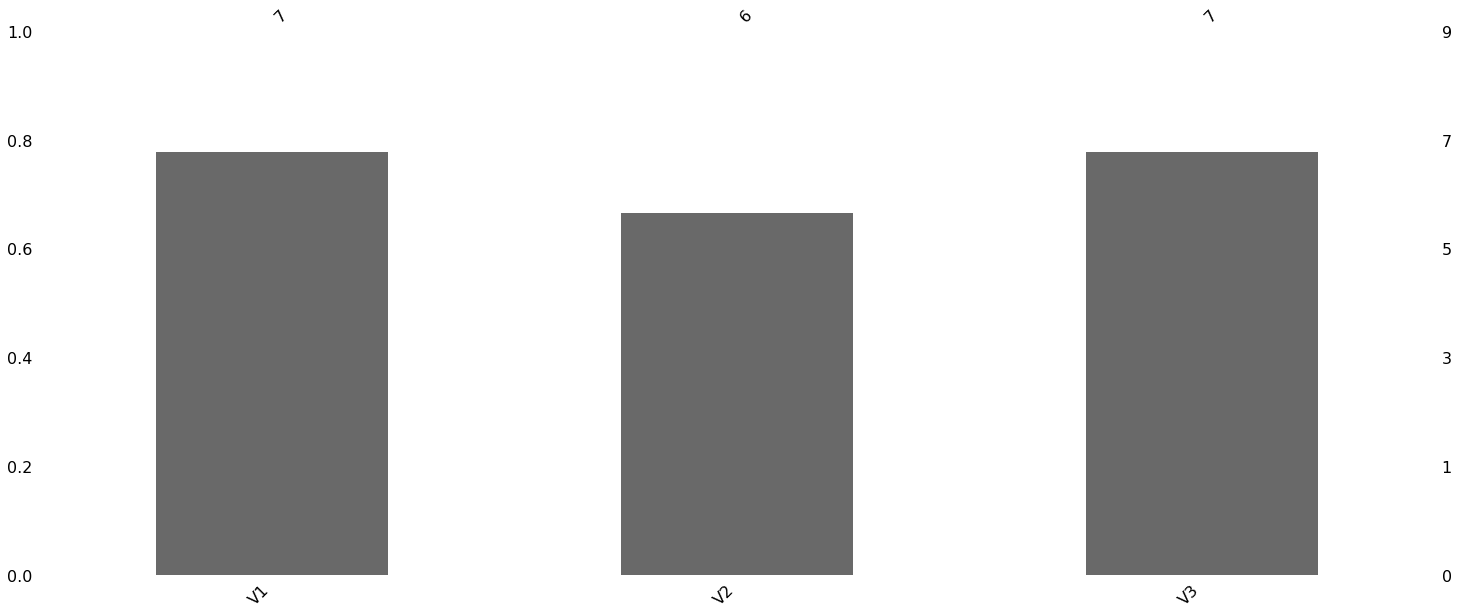

In [238]:
# Oransal
msno.bar(df); # Değişkenlerdeki eksiklik durumunu gösterelim

In [239]:
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

In [240]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


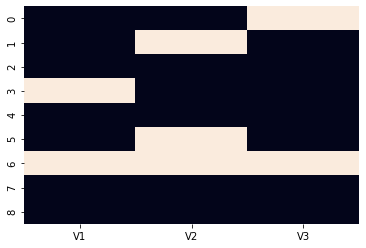

In [241]:
#Eksik veride bir örüntü var mı yok mu?
import seaborn as sns
sns.heatmap(df.isnull(), cbar = False);

<AxesSubplot:>

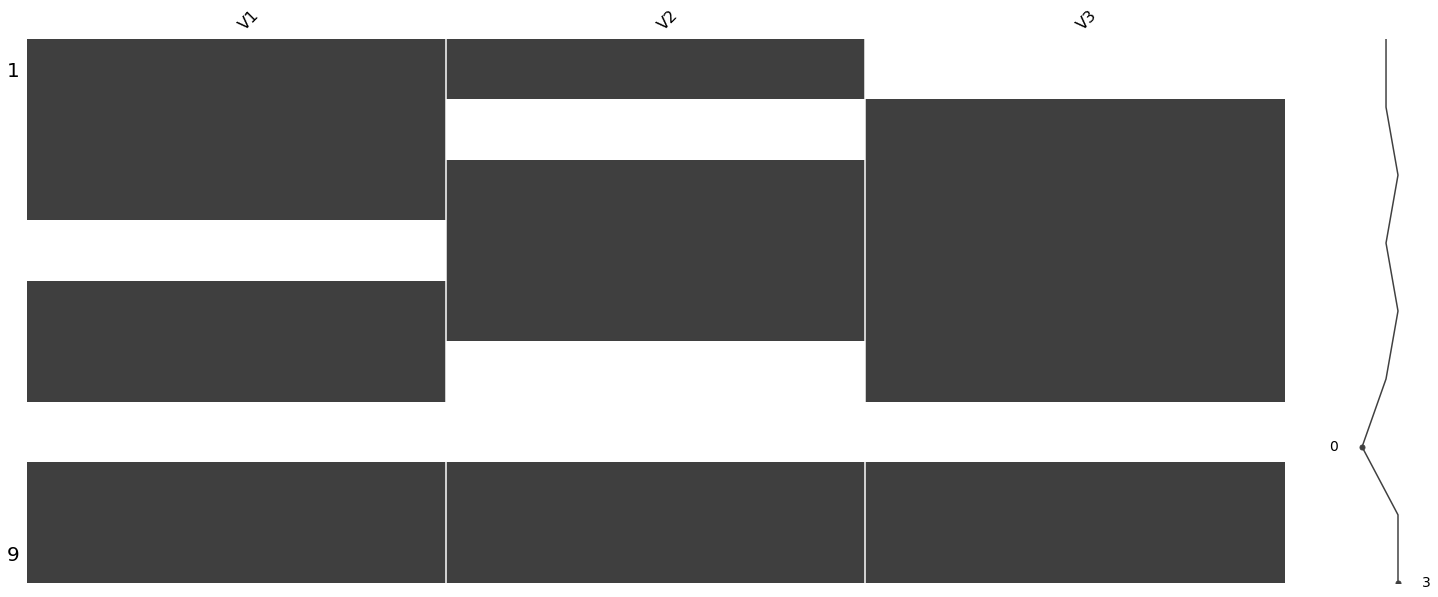

In [242]:
# Eksik değer sayısını da görebiliriz.
msno.matrix(df)

In [243]:
df = sns.load_dataset("planets").copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


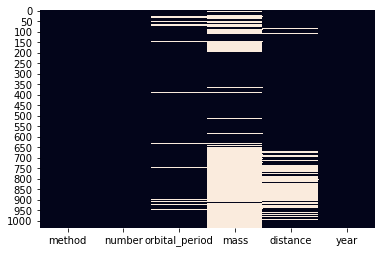

In [244]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar = False);

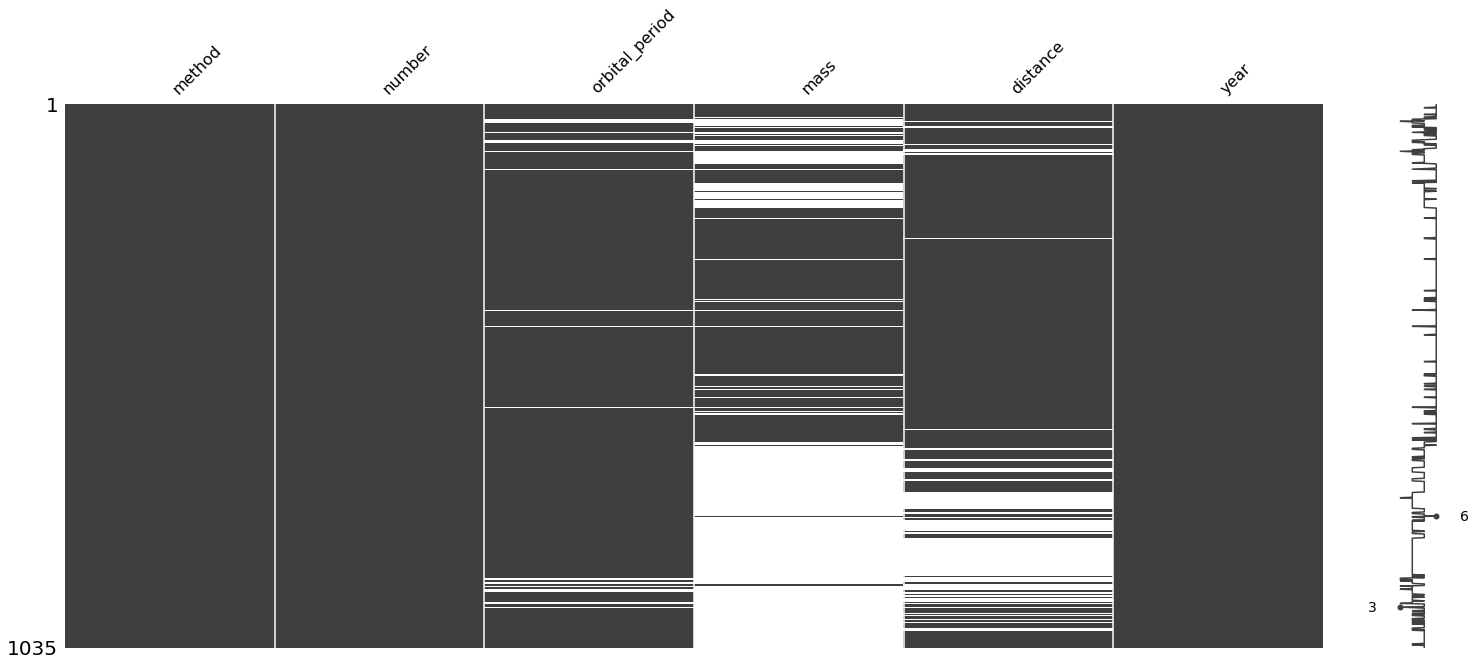

In [245]:
# Aynı grafik msno ile inceleme
# Eksik veri rastgele değil yorumunda bulunabiliriz.
msno.matrix(df);

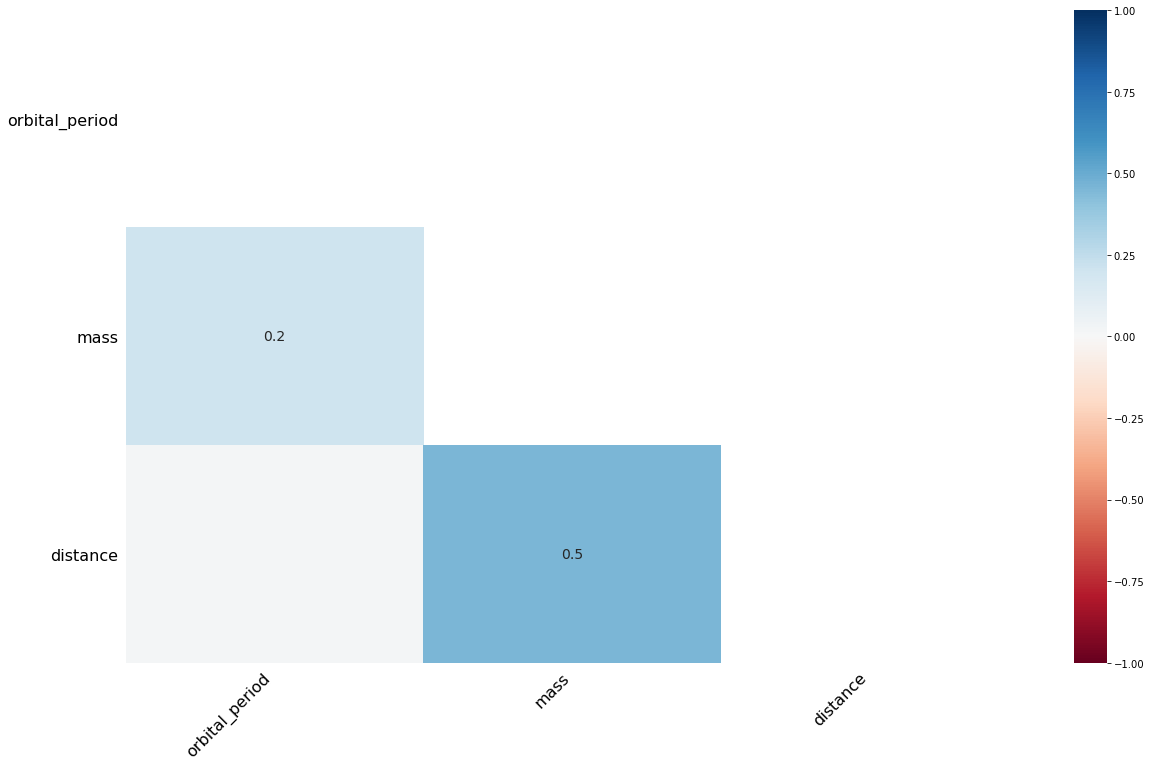

In [246]:
# Mass değişkeniyle distance değişkeni arasında orta şiddette ilişki var. %50 ihtimalle eksik veri içerir.
msno.heatmap(df);

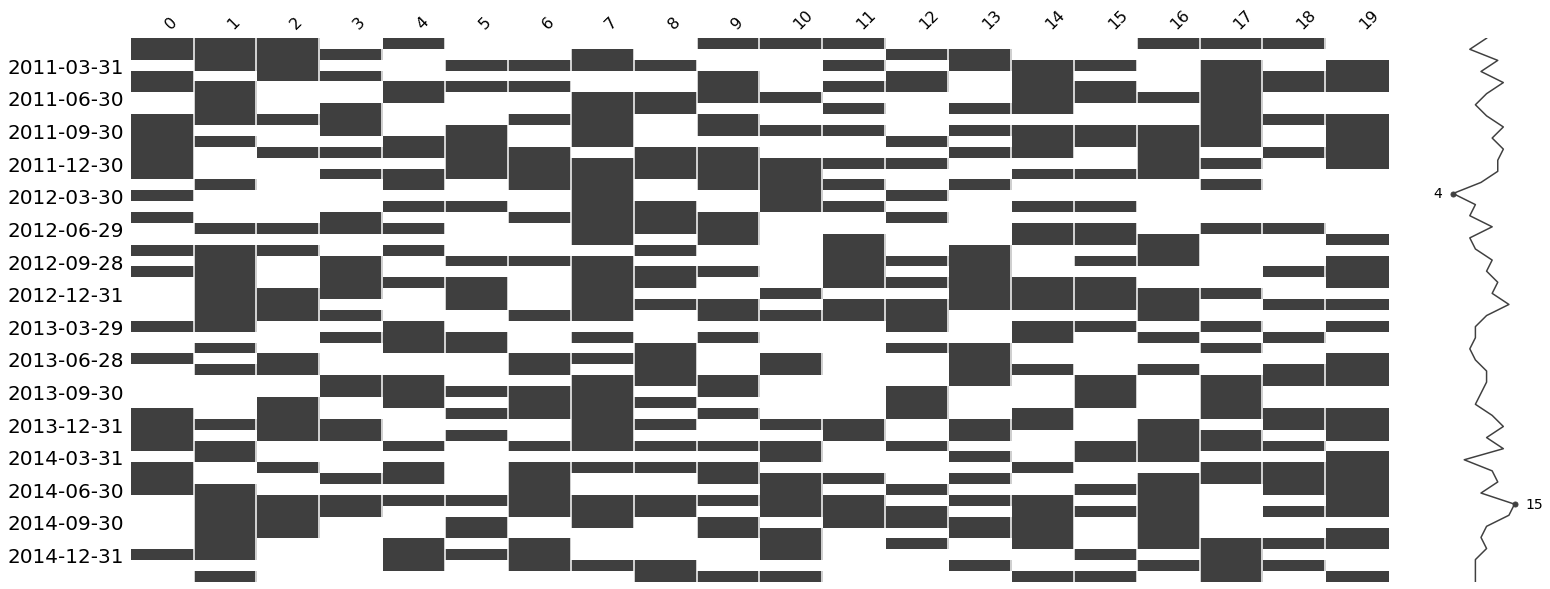

In [247]:
null_pattern = (np.random.random(1000).reshape((50, 20)) > 0.5).astype(bool)

null_pattern = pd.DataFrame(null_pattern).replace({False: None})

msno.matrix(null_pattern.set_index(pd.period_range('1/1/2011', '2/1/2015', freq='M')) , freq='BQ');

## Silme Yöntemleri

In [ ]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

In [ ]:
df.dropna() # Değişkenlerde bir tane bile eksik değer varsa o gözlemi tamamen siler

In [ ]:
df.dropna(how = "all") # Tüm değişkenleri eksik olan gözlemi siler.

In [ ]:
df.dropna(axis = 1) 

In [ ]:
df["V1"][[3,6]] = 99

In [ ]:
df.dropna(axis = 1) # En az 1 tane eksik değer olan sütunlardaki değişkenleri sildi.

In [ ]:
df.dropna(axis = 1, how = "all") # Tamamı eksik değer olanları sildi, geriye kalanlar.

In [ ]:
df["sil_beni"] = np.nan # Tüm gözlemleri nan olan değişken ürettik

In [ ]:
df

In [ ]:
df.dropna(axis = 1, how = "all", inplace = True)

In [ ]:
df

In [ ]:
# Rassallık testi sonrasında eksik gözlemleri silme veya değiştirme işlemlerini yukarıdaki gibi yapabilirsin.

## Basit Değer Atama Yöntemleri

In [ ]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

In [ ]:
df["V1"].fillna(0)

In [ ]:
df["V1"].fillna(df["V1"].mean())

In [ ]:
df.apply(lambda x: x.fillna(x.mean()), axis = 0 ) # Tüm değişkenleri kendi ortalamaları ile doldur.

In [ ]:
df.fillna(df.mean()[:]) # Bu gösterim de aynısıdır.

In [ ]:
# Keşifçi veri analizinde dağılımına baktıktan sonra karar vermen lazım nasıl dolduracağına.
df.fillna(df.mean()["V1":"V2"]) # İlk iki değişkeni kendi ortalamaları ile doldurur.
df.fillna(df.median()["V3"])    # 3.değişkeni kendi median'ı ile doldurur.

In [ ]:
df.where(pd.notna(df), df.mean(), axis = "columns") # Pandas aracılığı ile aynı işlemi yapabilirsin.

In [ ]:
# Dağılım, medyan ve ortalama değerlerine baktıktan sonra, kategorik değişken kırılımlarını incelemen lazım.
# Aşağıda departmana göre maaşlar farklılık gösteriyor.
# DOlayısıyla maaşlardaki eksik veriyi doldururken departmanı göz önüne alman daha doğru veri seti oluşturmana yardımcı olur.

In [ ]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame(
        {"maas" : V1,
         "V2" : V2,
         "V3" : V3,
        "departman" : V4}        
)

df

In [ ]:
df.groupby("departman")["maas"].mean() # Departmana göre maaş ortalaması

In [ ]:
df["maas"].fillna(df.groupby("departman")["maas"].transform("mean")) # Departmana göre maaş ortalamasını basar eksik veri olan yere basar.

## Kategorik Değişkenlerde Değer Atama

In [ ]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT",np.NaN,"IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame(
        {"maas" : V1,
         "V2" : V2,
         "V3" : V3,
        "departman" : V4}        
)

df

In [ ]:
# Bazen kategorik değişkenlerde string değer olarak görüp algılamaz.
df.isnull()

In [ ]:
# BU yüzden kategorik değişkene göre sorgulama yapman gerekir.
df.groupby("departman")["departman"].count()

In [ ]:
# nan değerini yakaladıktan sonra atama yap
df.departman.loc[df.departman == "nan"] = "IK"

In [ ]:
# Hatayı görmezden geldik.
df
# Atamayı yaptı.

In [ ]:
# Hata yapmayı kullanarak na değeri yarattık
df.departman[0] = df.V3[0]

In [ ]:
df

In [ ]:
df.groupby("departman")["departman"].count()
# nAN DEĞERİNİ görmüyor.

In [ ]:
df.departman.fillna(df["departman"].mode())

# EN çok karşılaşılan ile doldur.

In [ ]:
# Kendinden önceki ve sonraki değerlerle de doldurabilirsin.


## ZamanSerilerinde Atama İşlemleri

In [ ]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame(
        {"maas" : V1,
         "V2" : V2,
         "V3" : V3,
        "departman" : V4}        
)

df

In [ ]:
df["maas"].interpolate()
# Bir önceki değer ile bir sonraki değerin ortalamasını yazar NaN değeri yerine.

In [ ]:
df["maas"].fillna(method = "bfill")
# Bir sonraki değer ile doldurur.

## Tahmine Dayalı Değer Atama Yöntemleri

number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64


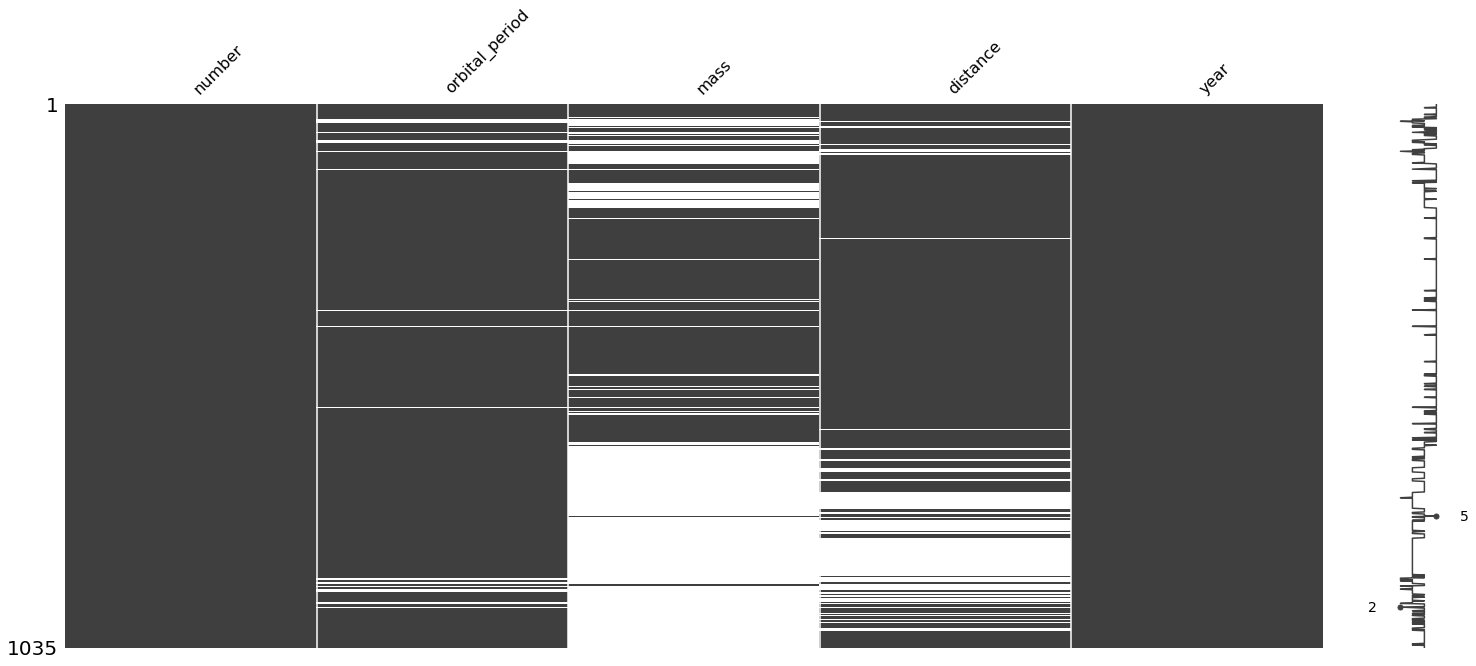

In [98]:
import seaborn as sns
df = sns.load_dataset('planets').copy()
df = df.select_dtypes(include = ['float64', 'int64'])
print(df.isnull().sum())
msno.matrix(df);

In [99]:
!pip install Keras

In [100]:
!pip install tensorflow

In [101]:
!pip install fancyimpute

In [102]:
import pandas as pd

In [103]:
# Değişken isimlerini liste olarak tutmamız gerekiyor.
var_names = list(df)

In [106]:
from fancyimpute import KNN


ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

## KNN

In [70]:
knn_imp = KNN(k = 5).fit_transform(df); # En yakın 5 değer ile doldurur.

NameError: name 'KNN' is not defined

In [77]:
knn_imp[0:1] # Array olarak gösterdik.

NameError: name 'knn_imp' is not defined

In [ ]:
dff = pd.DataFrame(knn_imp) # Data frame olarak kaydettik

In [ ]:
dff.head()

In [ ]:
dff.columns = var_names

In [ ]:
dff.head()

In [ ]:
dff.isnull().sum() # NaN var mı kontrol.

In [108]:
# Bir başka kütüphane ile uygulayalım
!pip install ycimpute

     |████████████████████████████████| 831.4 MB 4.0 MB/s eta 0:00:010   |▊                               | 18.2 MB 7.4 MB/s eta 0:01:51     |███                             | 75.7 MB 399 kB/s eta 0:31:34     |███▋                            | 93.5 MB 8.9 MB/s eta 0:01:24     |██████▎                         | 163.6 MB 7.5 MB/s eta 0:01:30     |████████████                    | 312.1 MB 6.2 MB/s eta 0:01:25     |████████████▉                   | 332.6 MB 6.9 MB/s eta 0:01:12     |██████████████▊                 | 383.0 MB 8.3 MB/s eta 0:00:55     |███████████████████▊            | 512.3 MB 5.6 MB/s eta 0:00:58     |███████████████████▊            | 513.1 MB 5.6 MB/s eta 0:00:58     |████████████████████▎           | 525.6 MB 3.1 MB/s eta 0:01:39     |████████████████████▋           | 534.9 MB 2.8 MB/s eta 0:01:47     |████████████████████▊           | 537.2 MB 1.6 MB/s eta 0:03:06     |██████████████████████          | 571.6 MB 3.3 MB/s eta 0:01:20     |██████████████████████▏         

In [107]:
from ycimpute.imputer import knnimput

ModuleNotFoundError: No module named 'ycimpute'

In [ ]:
var_names = list(df)

In [ ]:
n_df = np.array(df)

In [ ]:
n_df.shape

In [ ]:
dff = knnimput.KNN(k=4).complete(n_df)

In [ ]:
dff = pd.DataFrame(dff, columns = var_names)

In [ ]:
dff.head()

In [ ]:
dff.isnull().sum()

## Random Forests ile Atama

number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64


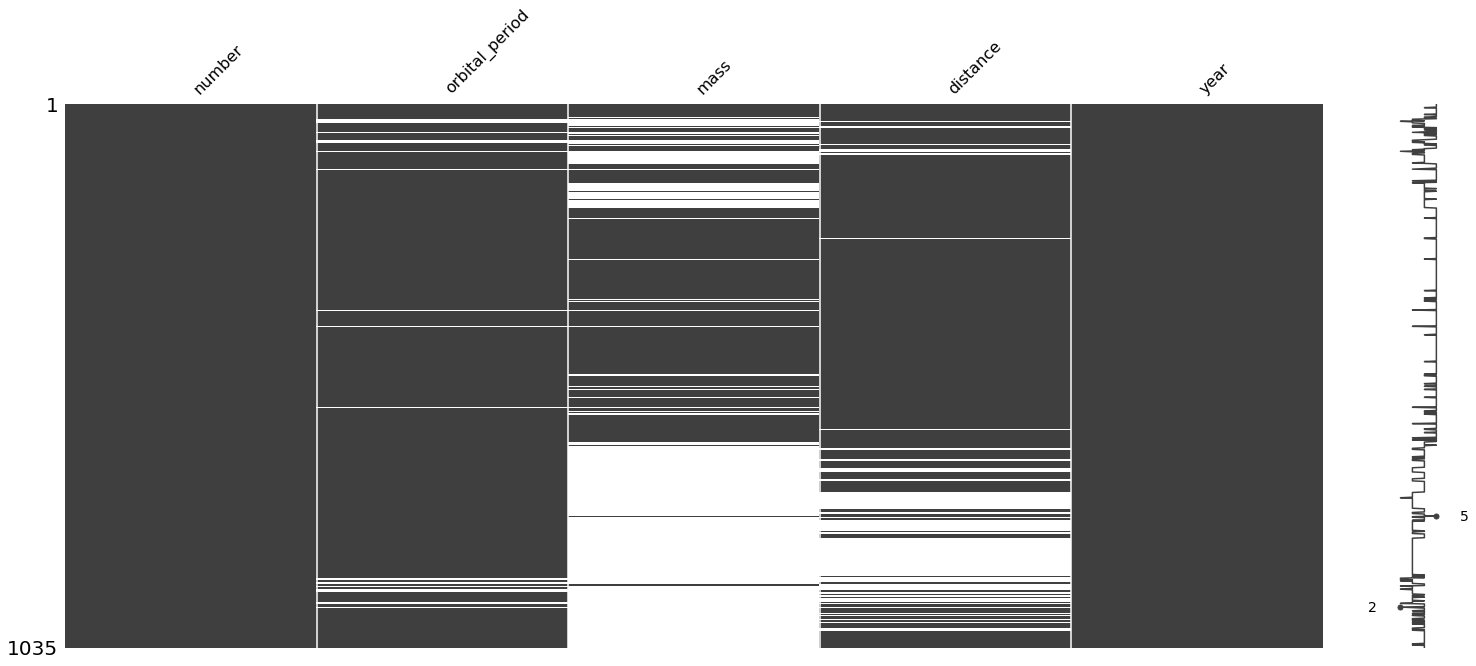

In [109]:
import seaborn as sns
df = sns.load_dataset('planets').copy()
df = df.select_dtypes(include = ['float64', 'int64'])
print(df.isnull().sum())
msno.matrix(df);

In [ ]:
from ycimpute.imputer import iterforest

In [ ]:
var_names = list(df)

In [ ]:
n_df = np.array(df)

In [ ]:
dff = iterforest.IterImput().complete(n_df)

In [ ]:
dff = pd.DataFrame(dff, columns = var_names)

In [ ]:
dff.isnull().sum()

## EM ile Atama

In [ ]:
df.head()

In [ ]:
from ycimpute.imputer import EM

In [ ]:
var_names = list(df)

In [ ]:
n_df = np.array(df)

In [ ]:
dff = EM().complete(n_df)

In [ ]:
dff = pd.DataFrame(dff, columns = var_names)

In [ ]:
dff.isnull().sum()

In [ ]:
# En mantıklı yöntem ise, eksik veri ve aşırı gözlemin olmadığı bir veri setine hatayı kullanarak ekleme yapmak ve sonrasında bunun üzerinde
# en yakın tahminleri yapan yöntemi karşılaştırarak kullanmaktır.

#  Veri Standardizasyonu & Değişken Dönüşümü

## Standartlaştırma

In [ ]:
# Standartizasyonda varyans değğişmez, ölçek değişir.
# Değişken dönüşümünde ise bazen varyans korunur bazen değşebilir.

In [3]:
import numpy as np
import pandas as pd

V1 = np.array([1,3,6,5,7])
V2 = np.array([7,7,5,8,12])
V3 = np.array([6,12,5,6,14])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)



df = df.astype(float)
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


In [4]:
# Bütün değişkenleri standartlaştırmış olduk.
from sklearn import preprocessing

In [5]:
preprocessing.scale(df)

array([[-1.57841037, -0.34554737, -0.70920814],
       [-0.64993368, -0.34554737,  0.92742603],
       [ 0.74278135, -1.2094158 , -0.98198051],
       [ 0.27854301,  0.08638684, -0.70920814],
       [ 1.2070197 ,  1.81412369,  1.47297076]])

## Normalizasyon

In [7]:
# Değişkenin değerlerini 0-1 aralığına dönüştürmek
# Aslında bu da bir standartlaştırma işlemidir.
preprocessing.normalize(df)

array([[0.10783277, 0.75482941, 0.64699664],
       [0.21107926, 0.49251828, 0.84431705],
       [0.64699664, 0.53916387, 0.53916387],
       [0.4472136 , 0.71554175, 0.53665631],
       [0.35491409, 0.60842415, 0.70982818]])

## Min-Max Dönüşümü

In [9]:
# Bir değişkenin değerini istediğimiz aralıkta oluşturmamızı sağlar
scaler = preprocessing.MinMaxScaler(feature_range = (10,20))

In [10]:
scaler.fit_transform(df)

array([[10.        , 12.85714286, 11.11111111],
       [13.33333333, 12.85714286, 17.77777778],
       [18.33333333, 10.        , 10.        ],
       [16.66666667, 14.28571429, 11.11111111],
       [20.        , 20.        , 20.        ]])

## Binarize Dönüşüm

In [11]:
# Belli bir eşik değere göre 0-1 dönüşümü

binarizer = preprocessing.Binarizer(threshold = 5).fit(df)

In [12]:
binarizer.transform(df)

array([[0., 1., 1.],
       [0., 1., 1.],
       [1., 0., 0.],
       [0., 1., 1.],
       [1., 1., 1.]])

## 0-1 Dönüşümü

In [13]:
import seaborn as sns
tips = sns.load_dataset('tips')
df = tips.copy()
df_l = df.copy()

In [14]:
df_l.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [16]:
# Kategorik değişkeni 0-1'e çevirme.
df_l["yeni_sex"] = df_l["sex"].cat.codes

# cat.codes ilk değeri 1 olarak kodlar.

In [17]:
df_l.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4,1


In [21]:
# Farklı bir yöntem ile (scikit learn) yeni scaler lbe
lbe = preprocessing.LabelEncoder()
# İlk yakaladığına 0 verir.
# Bu yüzden hangisini arıyorsan ona göre kullan ikisinden birini.

In [19]:
df_l["daha_yeni_sex"] = lbe.fit_transform(df_l["sex"])

In [20]:
df_l.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,daha_yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0


## "1 ve Diğerleri (0) " Dönüşümü

In [22]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [23]:
df_l.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,daha_yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0


In [26]:
# Sun'a 1 ver. Dİğerlerine 0 ver. 
df_l["yen_gun"] = np.where(df_l["day"].str.contains("Sun"),1,0)

In [25]:
df_l.head(20)

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,daha_yeni_sex,yen_gun
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0,1
5,25.29,4.71,Male,No,Sun,Dinner,4,0,1,1
6,8.77,2.00,Male,No,Sun,Dinner,2,0,1,1
7,26.88,3.12,Male,No,Sun,Dinner,4,0,1,1
8,15.04,1.96,Male,No,Sun,Dinner,2,0,1,1
9,14.78,3.23,Male,No,Sun,Dinner,2,0,1,1


## Çok Sınıflı Dönüşüm

In [27]:
lbe = preprocessing.LabelEncoder()

In [28]:
df_l["daha_yeni_gun"] = lbe.fit_transform(df_l["day"])

In [29]:
df_l
# Kategorik değişkenin bağımlı değişkene etkileri bozulur algoritmadan dolayı.
# Nominal değişkeni, Ordinal gibi algılar kategorik değişkeni.
# Kategorik değişkeni sürekli değişken gibi algılar.
# Bu yüzden one-hot dönüşümü yapılır.

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,daha_yeni_sex,yen_gun,daha_yeni_gun
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0,1,2
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1,1,2
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1,1,2
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1,1,2
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0,1,0,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1,0,0,1
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0,1,0,1
242,17.82,1.75,Male,No,Sat,Dinner,2,0,1,0,1


## One-Hot Dönüşümü ve Dummy Değişken Tuzağı

In [31]:
df_one_hot = df.copy()

In [32]:
# cinsiyet kategorik değişkenin sınıflarını değişken olarak dönüştürdük.
pd.get_dummies(df_one_hot, columns = ["sex"], prefix = ["sex"]).head()

# Aynı bilgiyi taşıyan iki değişken oldu.

# Dummy değişken tuzağı.

# Teke indirmen lazım.



,total_bill,tip,smoker,day,time,size,sex_Male,sex_Female
0,16.99,1.01,No,Sun,Dinner,2,0,1
1,10.34,1.66,No,Sun,Dinner,3,1,0
2,21.01,3.50,No,Sun,Dinner,3,1,0
3,23.68,3.31,No,Sun,Dinner,2,1,0
4,24.59,3.61,No,Sun,Dinner,4,0,1


In [33]:
pd.get_dummies(df_one_hot, columns = ["day"], prefix = ["day"]).head()

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,0,0,0,1
1,10.34,1.66,Male,No,Dinner,3,0,0,0,1
2,21.01,3.50,Male,No,Dinner,3,0,0,0,1
3,23.68,3.31,Male,No,Dinner,2,0,0,0,1
4,24.59,3.61,Female,No,Dinner,4,0,0,0,1


In [34]:
# Böylelikle kategorik değişkeni numerik değişkene çevirmiş olduk.

## Sürekli Değişkeni Kategorik Değişkene Çevirme

In [ ]:
# Scikit learn ile

In [35]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [38]:
# Kullanacağın fonksiyon sürekli değişkenleri kendini ayırmaz.
# Bu yüzden senin seçmen lazım.
dff = df.select_dtypes(include = ["float64", "int64"])
dff

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


In [ ]:
# Quantile ile eşik değer belirleyerek

In [39]:
est = preprocessing.KBinsDiscretizer(n_bins = [3,2,2], encode = "ordinal", strategy = "quantile").fit(dff)

In [40]:
est.transform(dff)[0:10]

array([[1., 0., 1.],
       [0., 0., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [0., 0., 1.],
       [2., 1., 1.],
       [1., 0., 1.],
       [0., 1., 1.]])

In [ ]:
# Sürekli değişkeni alıp kategorik değişkene çevirmek çok da pozitif bir şey değildir
# Hassas bir ölçüm olduğundan.
# Karar ağacında mesela, varyansı çok olan veride kullanılabilir.
# İstatistiksel anlamda incelemen lazım.
# Bu yüzden quantile metodu mantıklı olabilir, testlerin haricinde.
# En azından bir metriğe dayalı yapmış olursun.


## Değişkeni İndexe, İndexi Değişkene Çevirmek

In [41]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [42]:
df["yeni_degisken"]  = df.index

In [43]:
df["yeni_degisken"] = df["yeni_degisken"] + 10

In [44]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_degisken
0,16.99,1.01,Female,No,Sun,Dinner,2,10
1,10.34,1.66,Male,No,Sun,Dinner,3,11
2,21.01,3.50,Male,No,Sun,Dinner,3,12
3,23.68,3.31,Male,No,Sun,Dinner,2,13
4,24.59,3.61,Female,No,Sun,Dinner,4,14


In [45]:
df.index = df["yeni_degisken"]

In [46]:
df.index

Int64Index([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,
            ...
            244, 245, 246, 247, 248, 249, 250, 251, 252, 253],
           dtype='int64', name='yeni_degisken', length=244)